# Легенда
В личном кабинете [mos.ru](http://mos.ru) есть раздел "Избранное", который пользователи могут наполнять по своему усмотрению. Мы хотим сделать его более полезным для наших пользователей, но пока не проводили комплексный анализ.

В тестовом мы просим тебя посмотреть на текущую реализацию "Избранного", указать, какие решения кажутся тебе удачными, а какие - наоборот. Продумать 1-3 ключевых метрик  и предложить пару рекомендаций по улучшению (гипотезы и как будешь проверять). В помощь мы даем выгрузку из базы данных. Также просим тебя оценить выгрузку - достаточно ли данных для исследования? Если нет, то что хотелось бы добавить.


# [Сразу перейти на выводы :)](#cell1)  

### Описание выгрузки
- `date` - дата события
- `hit_category` - событие (просмотр блока, добавление/удаление из избранного итд)
- `details` - содержимое блока в виде "Блок 1: %название%, Блок 2: %название%, Блок 3: %название%"
- `users` - это количество уникальных пользователей, у которых было указанное событие в указанном блоке
- `hits` - количество событий

В резюме и тестовом мы ожидаем, что ты продемонстрируешь глубокое понимание работы с продуктовыми метриками, ориентированность на результат, умение находить инсайты в данных, выдвигать и проверять гипотезы.
### [Сcылка на текстовый отчет](https://docs.google.com/document/d/1G7Jx852Zbum6ZOjLGCeoAth245Q54_8Sz3SBmzKxBiY/edit?usp=sharing)

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as s
import seaborn as sns
from tqdm import tqdm

from scipy import stats

from statsmodels.stats.weightstats import ztest

%matplotlib inline
from pandas_profiling import ProfileReport 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [63]:
df = pd.read_csv('C:\\Users\\User\\Downloads\\test_data.csv')

## Посмотрим структуру таблицы внешними модулями

In [64]:
df_inf=ProfileReport(df)
df_inf

In [65]:
# import sweetviz as sv
# # for i in df_list:
# #     advert_report = sv.analyze(i)
# #     advert_report.show_html('Advertising.html')
# advert_report = sv.analyze(df)
# advert_report.show_html('Advertising.html')

<div style="border:solid red 2px; padding: 20px">
<div class="alert alert-danger">
<b>Внимание</b></div>

Видим сильную корреляцию между столбцами users и hits

In [66]:
display(df)

,Unnamed: 0,date,hit_category,details,users,hits
0,0,2020-12-23,Просмотр блоков,"Блок 1: Проверка и пополнение баланса домашнего телефона МГТС, Блок 2: Запрос, изменение и отмена доступа к электронной медицинской карте",5.0,10.0
1,1,2020-12-13,Просмотр блоков,"Блок 1: Пополнение счёта карты ребёнка, Блок 2: Доступ к электронному дневнику, Блок 3: Запись в кружки, спортивные секции, дома творчества, Блок 4: Запись на приём к врачу, отмена и перенос записи",25.0,91.0
2,2,2020-12-29,Просмотр блоков,"Блок 1: Подача заявления и документов для назначения и предоставления единовременной компенсационной выплаты на возмещение расходов в связи с рождением (усыновлением) ребенка, Блок 2: Прием заявлений на запись (перевод) в образовательную организацию (дошкольные группы)",122.0,482.0
3,3,2021-01-11,Просмотр блоков,"Блок 1: Запись на приём к врачу, отмена и перенос записи, Блок 2: Предоставление сведений Фондом капитального ремонта многоквартирных домов города Москвы, Блок 3: Предоставление информации технического учета в городе Москве, Блок 4: Предоставление информации жилищного учёта, Блок 5: Подписка на информирование о результатах лабораторных, инструментальных и иных видов диагностических исследований",5.0,10.0
4,4,2020-12-05,Просмотр блоков,"Блок 1: Поиск медучреждений, Блок 2: Путёвки на отдых и оздоровление детей, Блок 3: Запись в кружки, спортивные секции, дома творчества, Блок 4: Запись на приём, Блок 5: Запись на приём к врачу, отмена и перенос записи",5.0,56.0
...,...,...,...,...,...,...
129129,129129,2020-12-04,Просмотр блоков,"Блок 1: Запись на приём, Блок 2: Пополнение карты «Тройка», Блок 3: Предоставление информации жилищного учёта, Блок 4: Запись на приём к врачу, отмена и перенос записи",5.0,20.0
129130,129130,2021-01-26,Просмотр блоков,"Блок 1: Запись на приём к врачу, отмена и перенос записи, Блок 2: Запись домашнего животного на прием к ветеринарному врачу",5.0,5.0
129131,129131,2021-01-15,Просмотр блоков,"Блок 1: Путёвки для отдыха и оздоровления детей, Блок 2: Подача заявления и документов для назначения и предоставления ежемесячного пособия на ребенка, Блок 3: Запись на приём к врачу, отмена и перенос записи, Блок 4: Подписка на информирование о результатах лабораторных, инструментальных и иных видов диагностических исследований",5.0,36.0
129132,129132,2020-12-02,Просмотр блоков,"Блок 1: Прием показаний электросчетчиков и оплата электроэнергии, Блок 2: Предоставление сведений Фондом капитального ремонта многоквартирных домов города Москвы",5.0,5.0


## Посмотрим содержание таблицы

In [67]:
def total_info(df, name_list):
    print('Название колонок таблицы', name_list)
    print('___________________________________________')
    display(df.columns) # название колонок
    print('___________________________________________')
    print('Cтруктура таблицы', name_list)
    print('___________________________________________')
    display(df.head())# структуру таблицы
    print('___________________________________________')
    print('Общая информация Info таблицы', name_list)
    print('___________________________________________')
    display(df.info())# состав таблицы, формат столбцов, наличие пустых строк
    print('___________________________________________')
    print('Общая информация describe таблицы', name_list)
    print('___________________________________________')
    display(df.describe())# используются для просмотра некоторых основных статистических данных, 
    # таких как процентиль, среднее значение, стандартное отклонение и т. Д.
    print('___________________________________________')
    print('Hаличие нулевых обьектов в таблице', name_list)
    print('___________________________________________')
    display(df.isnull().sum()) # наличие нулевых обьектов
    print('___________________________________________')
    print('Наличие пропусков в таблице' , name_list)
    print('___________________________________________')
    display(df.isna().sum())# наличие пропусков
    print('___________________________________________')
    print('Hаличие дубликатов в таблице' , name_list)
    print('___________________________________________')
    display(df.duplicated().sum()) # наличие дубликатов

In [68]:
total_info(df, 'Избранное')

Название колонок таблицы Избранное
___________________________________________


Index(['Unnamed: 0', 'date', 'hit_category', 'details', 'users', 'hits'], dtype='object')

___________________________________________
Cтруктура таблицы Избранное
___________________________________________


,Unnamed: 0,date,hit_category,details,users,hits
0,0,2020-12-23,Просмотр блоков,"Блок 1: Проверка и пополнение баланса домашнего телефона МГТС, Блок 2: Запрос, изменение и отмена доступа к электронной медицинской карте",5.0,10.0
1,1,2020-12-13,Просмотр блоков,"Блок 1: Пополнение счёта карты ребёнка, Блок 2: Доступ к электронному дневнику, Блок 3: Запись в кружки, спортивные секции, дома творчества, Блок 4: Запись на приём к врачу, отмена и перенос записи",25.0,91.0
2,2,2020-12-29,Просмотр блоков,"Блок 1: Подача заявления и документов для назначения и предоставления единовременной компенсационной выплаты на возмещение расходов в связи с рождением (усыновлением) ребенка, Блок 2: Прием заявлений на запись (перевод) в образовательную организацию (дошкольные группы)",122.0,482.0
3,3,2021-01-11,Просмотр блоков,"Блок 1: Запись на приём к врачу, отмена и перенос записи, Блок 2: Предоставление сведений Фондом капитального ремонта многоквартирных домов города Москвы, Блок 3: Предоставление информации технического учета в городе Москве, Блок 4: Предоставление информации жилищного учёта, Блок 5: Подписка на информирование о результатах лабораторных, инструментальных и иных видов диагностических исследований",5.0,10.0
4,4,2020-12-05,Просмотр блоков,"Блок 1: Поиск медучреждений, Блок 2: Путёвки на отдых и оздоровление детей, Блок 3: Запись в кружки, спортивные секции, дома творчества, Блок 4: Запись на приём, Блок 5: Запись на приём к врачу, отмена и перенос записи",5.0,56.0


___________________________________________
Общая информация Info таблицы Избранное
___________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129134 entries, 0 to 129133
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    129134 non-null  int64  
 1   date          129134 non-null  object 
 2   hit_category  129134 non-null  object 
 3   details       129029 non-null  object 
 4   users         129134 non-null  float64
 5   hits          129134 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.9+ MB


None

___________________________________________
Общая информация describe таблицы Избранное
___________________________________________


,Unnamed: 0,users,hits
count,129134.000000,129134.000000,1.291340e+05
mean,64566.500000,76.502579,3.637621e+02
std,37277.919168,2591.270022,1.468439e+04
min,0.000000,5.000000,5.000000e+00
25%,32283.250000,5.000000,5.000000e+00
50%,64566.500000,5.000000,1.500000e+01
75%,96849.750000,5.000000,3.600000e+01
max,129133.000000,198504.000000,2.235387e+06


___________________________________________
Hаличие нулевых обьектов в таблице Избранное
___________________________________________


Unnamed: 0        0
date              0
hit_category      0
details         105
users             0
hits              0
dtype: int64

___________________________________________
Наличие пропусков в таблице Избранное
___________________________________________


Unnamed: 0        0
date              0
hit_category      0
details         105
users             0
hits              0
dtype: int64

___________________________________________
Hаличие дубликатов в таблице Избранное
___________________________________________


0

#### Вообщем все нормально, но видим 105 нулевых обьектов в столбце  `details`

In [69]:
display(df.sort_values(by= ['users'], ascending=False).head(107))

,Unnamed: 0,date,hit_category,details,users,hits
36606,36606,2020-12-21,Просмотр блоков,NaN,198504.0,943141.0
121991,121991,2020-12-15,Просмотр блоков,NaN,196027.0,871481.0
78311,78311,2020-12-17,Просмотр блоков,NaN,191528.0,847689.0
68752,68752,2020-12-16,Просмотр блоков,NaN,191198.0,882234.0
62997,62997,2020-12-22,Просмотр блоков,NaN,188573.0,927818.0
88651,88651,2020-12-18,Просмотр блоков,NaN,181699.0,851756.0
56106,56106,2020-12-23,Просмотр блоков,NaN,178612.0,1510993.0
113483,113483,2020-12-14,Просмотр блоков,NaN,176804.0,787300.0
11102,11102,2020-12-24,Просмотр блоков,NaN,171991.0,849151.0
61294,61294,2020-12-28,Просмотр блоков,NaN,167203.0,786260.0


#### Это клиенты которые в избранное ничего не добавили

#### И приведем столбец date к формату даты

In [70]:
df['date'] = pd.to_datetime(df['date'])

In [71]:
df['date'].describe()

<ipython-input-71-07e98f8ab9f6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['date'].describe()


count                  129134
unique                     81
top       2020-12-21 00:00:00
freq                     2751
first     2020-12-01 00:00:00
last      2021-02-19 00:00:00
Name: date, dtype: object

<div style="border:solid red 2px; padding: 20px">
<div class="alert alert-danger">
<b>Внимание</b></div>
В выборке 81 день

#### Приведем столбец `df['details']` к нижнему регистру

In [72]:
df['details'] = df['details'].str.lower()
display(df.head())

,Unnamed: 0,date,hit_category,details,users,hits
0,0,2020-12-23,Просмотр блоков,"блок 1: проверка и пополнение баланса домашнего телефона мгтс, блок 2: запрос, изменение и отмена доступа к электронной медицинской карте",5.0,10.0
1,1,2020-12-13,Просмотр блоков,"блок 1: пополнение счёта карты ребёнка, блок 2: доступ к электронному дневнику, блок 3: запись в кружки, спортивные секции, дома творчества, блок 4: запись на приём к врачу, отмена и перенос записи",25.0,91.0
2,2,2020-12-29,Просмотр блоков,"блок 1: подача заявления и документов для назначения и предоставления единовременной компенсационной выплаты на возмещение расходов в связи с рождением (усыновлением) ребенка, блок 2: прием заявлений на запись (перевод) в образовательную организацию (дошкольные группы)",122.0,482.0
3,3,2021-01-11,Просмотр блоков,"блок 1: запись на приём к врачу, отмена и перенос записи, блок 2: предоставление сведений фондом капитального ремонта многоквартирных домов города москвы, блок 3: предоставление информации технического учета в городе москве, блок 4: предоставление информации жилищного учёта, блок 5: подписка на информирование о результатах лабораторных, инструментальных и иных видов диагностических исследований",5.0,10.0
4,4,2020-12-05,Просмотр блоков,"блок 1: поиск медучреждений, блок 2: путёвки на отдых и оздоровление детей, блок 3: запись в кружки, спортивные секции, дома творчества, блок 4: запись на приём, блок 5: запись на приём к врачу, отмена и перенос записи",5.0,56.0


## Посмотрим состав колонки `users` и `hits`

In [73]:
df['users'].describe()

count    129134.000000
mean         76.502579
std        2591.270022
min           5.000000
25%           5.000000
50%           5.000000
75%           5.000000
max      198504.000000
Name: users, dtype: float64

In [74]:
(df['users'] == 5.0).sum()

98564

In [75]:
(df['users']).count()

129134

In [76]:
display('В колонке `users` количество значений пять равно {:.0f}%'.format((((df['users'] == 5.0).sum()/(df['users']).count())*100).round(1)))

'В колонке `users` количество значений пять равно 76%'

<div style="border:solid red 2px; padding: 20px">
<div class="alert alert-danger">
<b>Внимание</b></div>
В колонке `users`  аномально большое  количество значений пять,   76,3%

#### Посмотрим на этих пользователей поподробнее

In [77]:
df_five = df[df['users']==5]
display(df_five)

,Unnamed: 0,date,hit_category,details,users,hits
0,0,2020-12-23,Просмотр блоков,"блок 1: проверка и пополнение баланса домашнего телефона мгтс, блок 2: запрос, изменение и отмена доступа к электронной медицинской карте",5.0,10.0
3,3,2021-01-11,Просмотр блоков,"блок 1: запись на приём к врачу, отмена и перенос записи, блок 2: предоставление сведений фондом капитального ремонта многоквартирных домов города москвы, блок 3: предоставление информации технического учета в городе москве, блок 4: предоставление информации жилищного учёта, блок 5: подписка на информирование о результатах лабораторных, инструментальных и иных видов диагностических исследований",5.0,10.0
4,4,2020-12-05,Просмотр блоков,"блок 1: поиск медучреждений, блок 2: путёвки на отдых и оздоровление детей, блок 3: запись в кружки, спортивные секции, дома творчества, блок 4: запись на приём, блок 5: запись на приём к врачу, отмена и перенос записи",5.0,56.0
5,5,2021-02-01,Просмотр блоков,"блок 1: пополнение карты «тройка», блок 2: предоставление информации жилищного учёта, блок 3: предоставление сведений фондом капитального ремонта многоквартирных домов города москвы",5.0,10.0
10,10,2021-01-20,Просмотр блоков,"блок 1: запись в кружки, спортивные секции, дома творчества, блок 2: прием заявлений на запись (перевод) в образовательную организацию (дошкольные группы), блок 3: поиск медучреждений, блок 4: посещение и питание, блок 5: заявление на выпуск карты москвича для учащегося",5.0,5.0
...,...,...,...,...,...,...
129128,129128,2020-12-25,Просмотр блоков,"блок 1: назначение отдельных видов пособий и компенсаций семьям с детьми, в том числе многодетным, блок 2: назначение и предоставление ежемесячной компенсационной выплаты на возмещение роста стоимости продуктов питания отдельным категориям граждан на детей в возрасте до трех лет, блок 3: предоставление информации о результатах государственной итоговой аттестации (егэ, огэ, гвэ), итогового сочинения (изложения), итогового собеседования по русскому языку, блок 4: запись в кружки, спортивные секции, дома творчества, блок 5: доступ к электронному дневнику",5.0,30.0
129129,129129,2020-12-04,Просмотр блоков,"блок 1: запись на приём, блок 2: пополнение карты «тройка», блок 3: предоставление информации жилищного учёта, блок 4: запись на приём к врачу, отмена и перенос записи",5.0,20.0
129130,129130,2021-01-26,Просмотр блоков,"блок 1: запись на приём к врачу, отмена и перенос записи, блок 2: запись домашнего животного на прием к ветеринарному врачу",5.0,5.0
129131,129131,2021-01-15,Просмотр блоков,"блок 1: путёвки для отдыха и оздоровления детей, блок 2: подача заявления и документов для назначения и предоставления ежемесячного пособия на ребенка, блок 3: запись на приём к врачу, отмена и перенос записи, блок 4: подписка на информирование о результатах лабораторных, инструментальных и иных видов диагностических исследований",5.0,36.0


In [78]:
df_five['hits'].value_counts()

5.0       33103
10.0      19892
15.0      11785
20.0       8648
25.0       4993
30.0       4633
36.0       2689
41.0       2470
46.0       1662
51.0       1499
61.0       1078
56.0        907
71.0        649
66.0        543
76.0        508
81.0        441
91.0        415
86.0        270
102.0       263
107.0       203
122.0       199
96.0        182
112.0       172
117.0       124
132.0       117
152.0        86
127.0        86
142.0        81
137.0        80
162.0        60
173.0        60
183.0        52
168.0        45
147.0        43
213.0        42
157.0        39
193.0        36
178.0        31
188.0        30
244.0        26
198.0        25
223.0        24
208.0        23
203.0        23
234.0        18
264.0        15
228.0        13
274.0        12
254.0        10
239.0        10
366.0         9
289.0         9
305.0         8
259.0         8
294.0         8
269.0         7
310.0         7
249.0         6
335.0         5
218.0         5
386.0         5
279.0         4
345.0   

In [79]:
df_five['details'].value_counts()

блок 1: запись на приём к врачу, отмена и перенос записи, блок 2: запись на приём, блок 3: подписка на информирование о результатах лабораторных, инструментальных и иных видов диагностических исследований                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   69
блок 1: запрос, изменение и отмена доступа к электронной медицинской карте, блок 2: внесение в реестр резидентных парковочных разрешений города москвы записи о продлении срока действия резидентного парковочного разрешения, блок 3: предоставление информации о результатах муниципального этапа всероссийской олимпиады школьников

### Ничего особеннного не заметно

## Посмотрим как распределяются пользователи

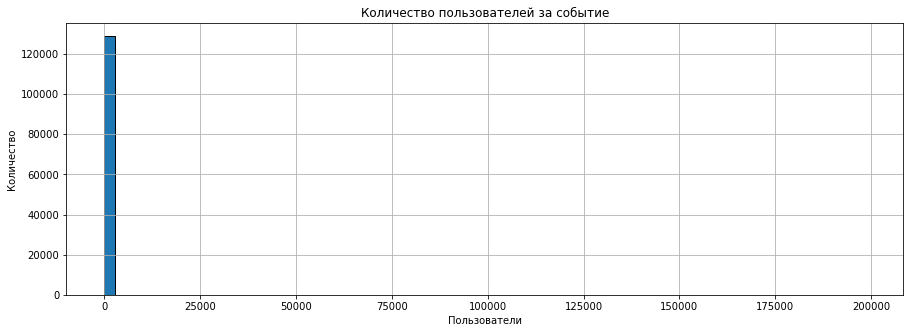

In [80]:
df['users'].hist(bins=70, figsize=(15, 5), ec='black')
plt.title('Количество пользователей за событие')
plt.xlabel("Пользователи")
plt.ylabel("Количество");

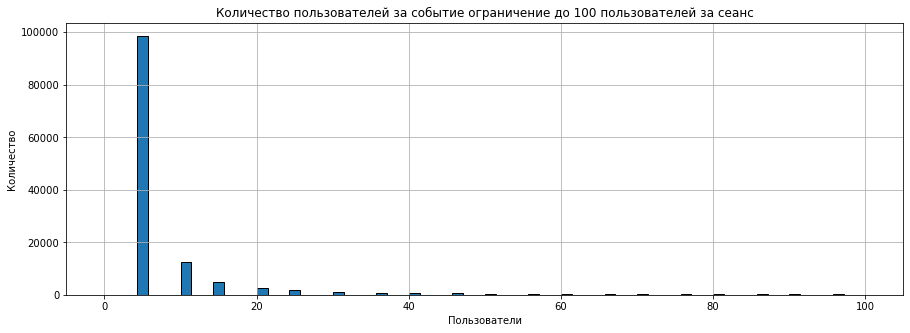

In [81]:


df['users'].hist(bins=70, figsize=(15, 5), ec='black', range=(0, 100) )
plt.title('Количество пользователей за событие ограничение до 100 пользователей за сеанс')
plt.xlabel("Пользователи")
plt.ylabel("Количество");

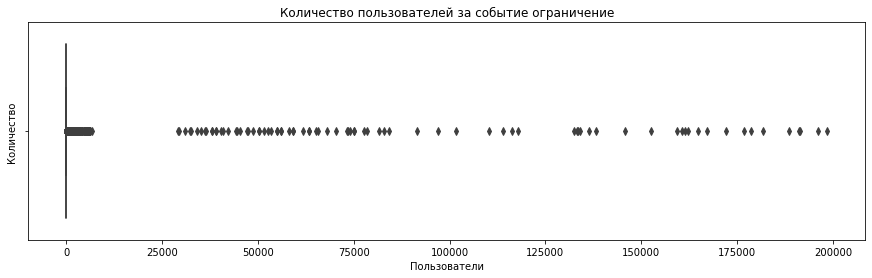

In [82]:
plt.figure(figsize=(15, 4))
sns.boxplot(x="users", data=df)
plt.title('Количество пользователей за событие ограничение')
plt.xlabel("Пользователи")
plt.ylabel("Количество");

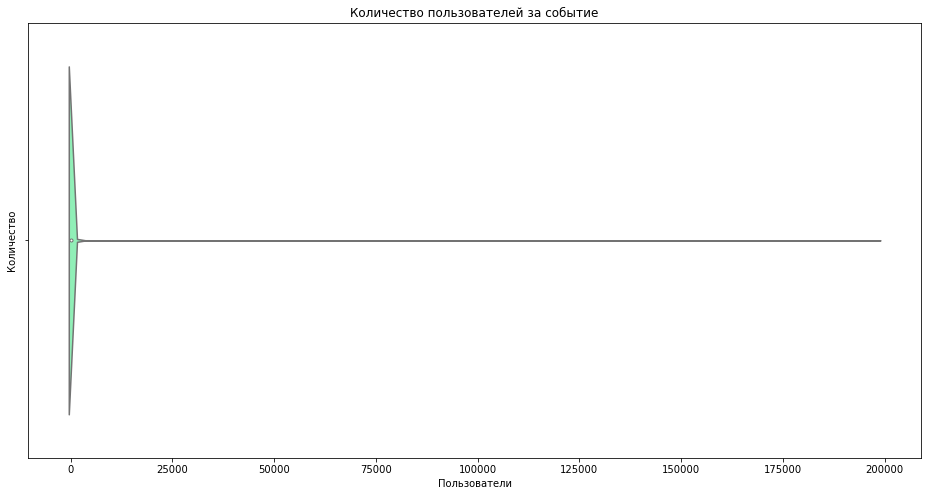

In [83]:
plt.figure(figsize=(16, 8))
sns.violinplot(x="users", data=df, palette='rainbow')
plt.title('Количество пользователей за событие')
plt.xlabel("Пользователи")
plt.ylabel("Количество"); 

## Просмотрим столбец "события" `df['hits']`

In [84]:
df['hits'].describe()

count    1.291340e+05
mean     3.637621e+02
std      1.468439e+04
min      5.000000e+00
25%      5.000000e+00
50%      1.500000e+01
75%      3.600000e+01
max      2.235387e+06
Name: hits, dtype: float64

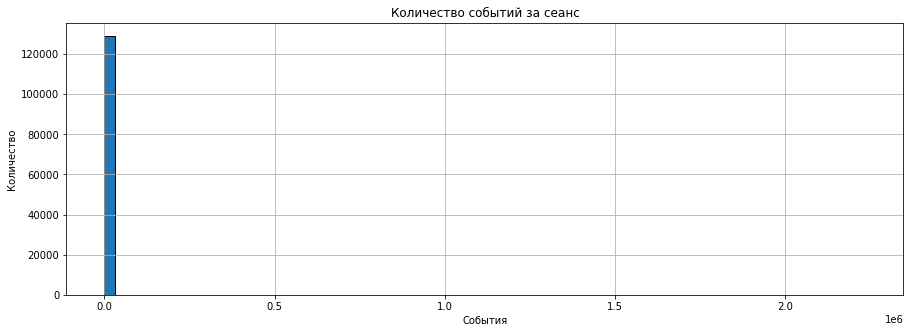

In [85]:
df['hits'].hist(bins=70, figsize=(15,5), ec='black')
plt.title('Количество событий за сеанс')
plt.xlabel("События")
plt.ylabel("Количество"); 

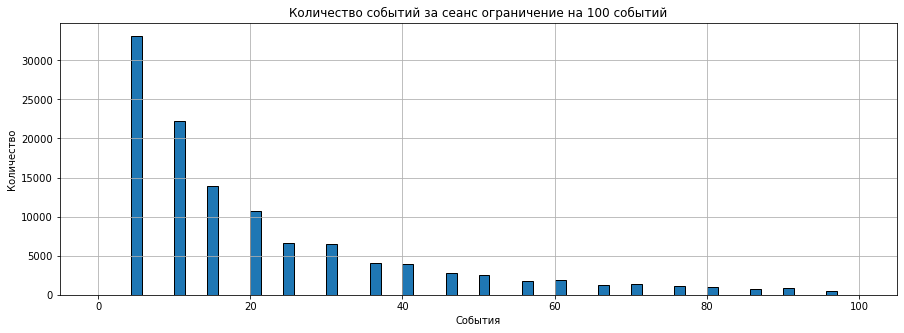

In [86]:
df['hits'].hist(bins=70, figsize=(15,5), ec='black', range=(0, 100))
plt.title('Количество событий за сеанс ограничение на 100 событий')
plt.xlabel("События")
plt.ylabel("Количество"); 

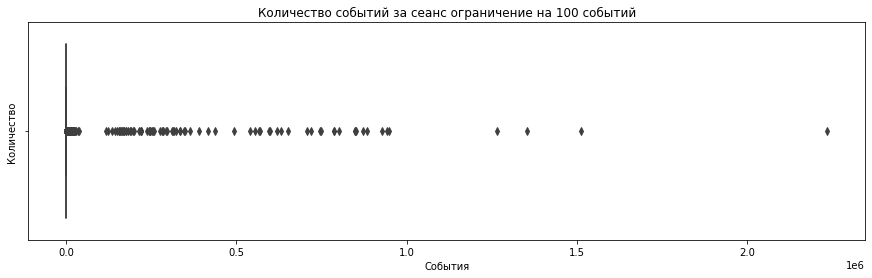

In [87]:
plt.figure(figsize=(15, 4))
sns.boxplot(x="hits", data=df)
plt.title('Количество событий за сеанс ограничение на 100 событий')
plt.xlabel("События")
plt.ylabel("Количество"); 

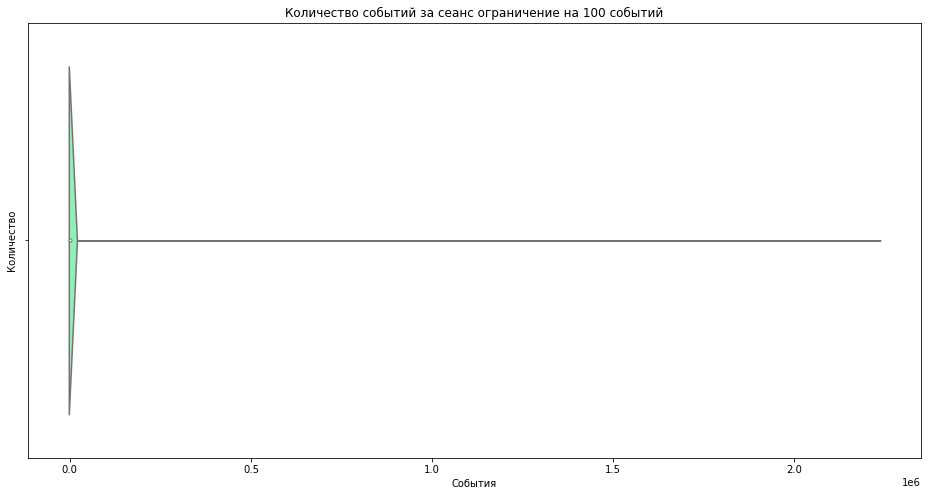

In [88]:
plt.figure(figsize=(16, 8))
sns.violinplot(x="hits", data=df, palette='rainbow')
plt.title('Количество событий за сеанс ограничение на 100 событий')
plt.xlabel("События")
plt.ylabel("Количество");  

 #### у распределений `hits` и `hits` очень тяжелые хвосты
 #### видимо это значения NaN
## Уберем  их из таблицы

In [89]:
df_out_nan = df.dropna()

In [90]:
display(df_out_nan.tail())

,Unnamed: 0,date,hit_category,details,users,hits
129129,129129,2020-12-04,Просмотр блоков,"блок 1: запись на приём, блок 2: пополнение карты «тройка», блок 3: предоставление информации жилищного учёта, блок 4: запись на приём к врачу, отмена и перенос записи",5.0,20.0
129130,129130,2021-01-26,Просмотр блоков,"блок 1: запись на приём к врачу, отмена и перенос записи, блок 2: запись домашнего животного на прием к ветеринарному врачу",5.0,5.0
129131,129131,2021-01-15,Просмотр блоков,"блок 1: путёвки для отдыха и оздоровления детей, блок 2: подача заявления и документов для назначения и предоставления ежемесячного пособия на ребенка, блок 3: запись на приём к врачу, отмена и перенос записи, блок 4: подписка на информирование о результатах лабораторных, инструментальных и иных видов диагностических исследований",5.0,36.0
129132,129132,2020-12-02,Просмотр блоков,"блок 1: прием показаний электросчетчиков и оплата электроэнергии, блок 2: предоставление сведений фондом капитального ремонта многоквартирных домов города москвы",5.0,5.0
129133,129133,2021-02-12,Просмотр блоков,"блок 1: предоставление информации о результатах государственной итоговой аттестации (егэ, огэ, гвэ), итогового сочинения (изложения), итогового собеседования по русскому языку",107.0,396.0


In [91]:
df_out_nan['users'].describe()

count    129029.000000
mean         20.399383
std         144.760779
min           5.000000
25%           5.000000
50%           5.000000
75%           5.000000
max        6844.000000
Name: users, dtype: float64

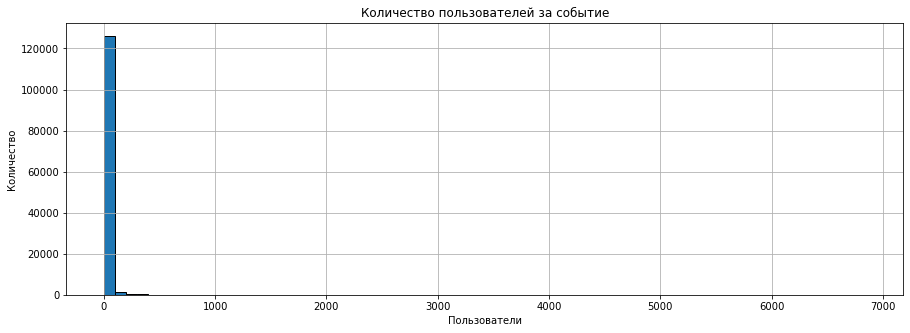

In [92]:
df_out_nan['users'].hist(bins=70, figsize=(15, 5), ec='black')
plt.title('Количество пользователей за событие')
plt.xlabel("Пользователи")
plt.ylabel("Количество"); 

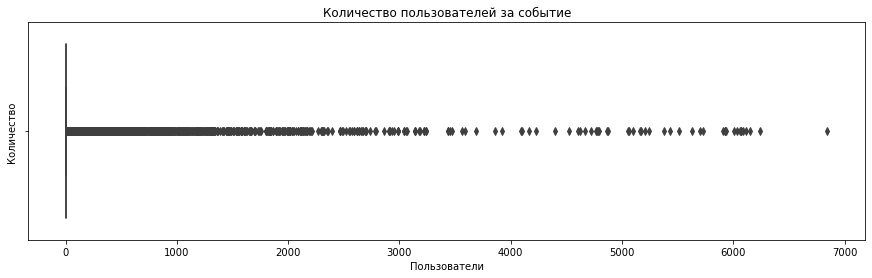

In [93]:
plt.figure(figsize=(15, 4))
sns.boxplot(x="users", data=df_out_nan)
plt.title('Количество пользователей за событие')
plt.xlabel("Пользователи")
plt.ylabel("Количество"); 

In [94]:
df_out_nan['hits'].describe()

count    129029.000000
mean         76.245797
std         518.258294
min           5.000000
25%           5.000000
50%          15.000000
75%          36.000000
max       36434.000000
Name: hits, dtype: float64

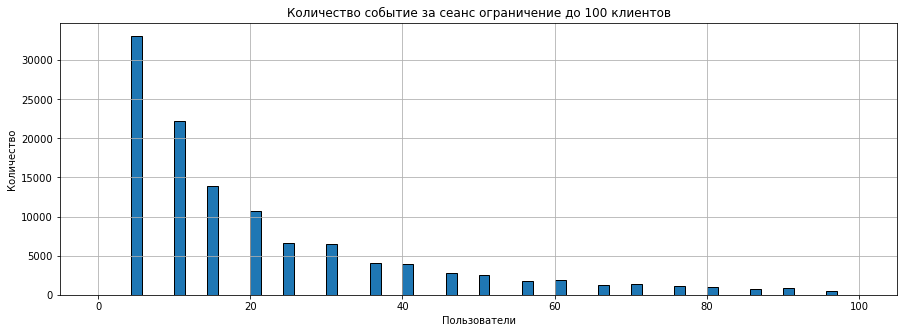

In [95]:
df_out_nan['hits'].hist(bins=70, figsize=(15,5), ec='black', range=(0, 100))
plt.title('Количество событие за сеанс ограничение до 100 клиентов')
plt.xlabel("Пользователи")
plt.ylabel("Количество"); 

<div style="border:solid red 2px; padding: 20px">
<div class="alert alert-danger">
<b>Внимание</b></div>

Удаление NaN особо ситуацию не исправило   

## Посчитаем сотношение пользователей не использующих и использующих "избранное"

In [96]:
display(df.head())

,Unnamed: 0,date,hit_category,details,users,hits
0,0,2020-12-23,Просмотр блоков,"блок 1: проверка и пополнение баланса домашнего телефона мгтс, блок 2: запрос, изменение и отмена доступа к электронной медицинской карте",5.0,10.0
1,1,2020-12-13,Просмотр блоков,"блок 1: пополнение счёта карты ребёнка, блок 2: доступ к электронному дневнику, блок 3: запись в кружки, спортивные секции, дома творчества, блок 4: запись на приём к врачу, отмена и перенос записи",25.0,91.0
2,2,2020-12-29,Просмотр блоков,"блок 1: подача заявления и документов для назначения и предоставления единовременной компенсационной выплаты на возмещение расходов в связи с рождением (усыновлением) ребенка, блок 2: прием заявлений на запись (перевод) в образовательную организацию (дошкольные группы)",122.0,482.0
3,3,2021-01-11,Просмотр блоков,"блок 1: запись на приём к врачу, отмена и перенос записи, блок 2: предоставление сведений фондом капитального ремонта многоквартирных домов города москвы, блок 3: предоставление информации технического учета в городе москве, блок 4: предоставление информации жилищного учёта, блок 5: подписка на информирование о результатах лабораторных, инструментальных и иных видов диагностических исследований",5.0,10.0
4,4,2020-12-05,Просмотр блоков,"блок 1: поиск медучреждений, блок 2: путёвки на отдых и оздоровление детей, блок 3: запись в кружки, спортивные секции, дома творчества, блок 4: запись на приём, блок 5: запись на приём к врачу, отмена и перенос записи",5.0,56.0


#### Не используют избранное

In [97]:
user_null = df.loc[(df['details'].isnull()) | (df['details'] == 'блок 1: null'), 'users'].sum()
display(user_null)

7263449.0

#### Используют избранное

In [98]:
user_not_null = df_out_nan.loc[df_out_nan['details'] != 'блок 1: null', 'users'].sum()
display(user_not_null)

2615635.0

In [99]:
all = df['users'].sum()
display('Всего пользователей', all)

'Всего пользователей'

9879084.0

In [100]:
display('Доля пользователей не использующих Избранное {:.0f}%'.format(user_null/all*100))

'Доля пользователей не использующих Избранное 74%'

In [101]:
display('Доля пользователей использующих Избранное {:.0f}%'.format(user_not_null/all*100))

'Доля пользователей использующих Избранное 26%'

<div style="border:solid red 2px; padding: 20px">
<div class="alert alert-danger">
<b>Внимание</b></div>
Большинство пользователей не использует Избранное, возможно пользоваться им не очень удобно

## Посмотрим действия и пользователей в зависимости от даты

In [102]:
df_action_date = df.groupby('date').agg({'users':'sum', 'hits':'sum'}).reset_index()
display(df_action_date.head())

,date,users,hits
0,2020-12-01,180977.0,754709.0
1,2020-12-02,182854.0,778070.0
2,2020-12-03,187715.0,811309.0
3,2020-12-04,182414.0,782618.0
4,2020-12-05,121201.0,510450.0


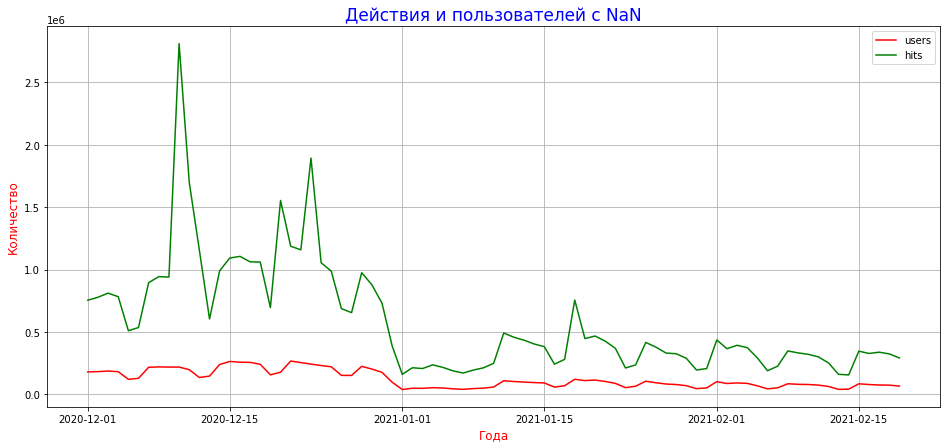

In [103]:
plt.figure(figsize=(16, 7))
plt.plot(df_action_date['date'], df_action_date['users'], '-r', label='users')
plt.plot(df_action_date['date'], df_action_date['hits'], '-g', label='hits')

#plt.plot(df_date['year_of_release'], df_date['total_sales'], '-r');
plt.title('Действия и пользователей с NaN', fontsize=17, color='blue')
plt.xlabel('Года',fontsize=12, color='red')
plt.ylabel('Количество',fontsize=12, color='red')
plt.legend()
plt.grid(True)
plt.show()


<div style="border:solid red 2px; padding: 20px">
<div class="alert alert-danger">
<b>Внимание</b></div>

    Видим возрастающий прирост пользователей и их действий перед новым годом

## Посмотрим действия и пользователей в зависимости от даты только тех кто пользуется Избранным

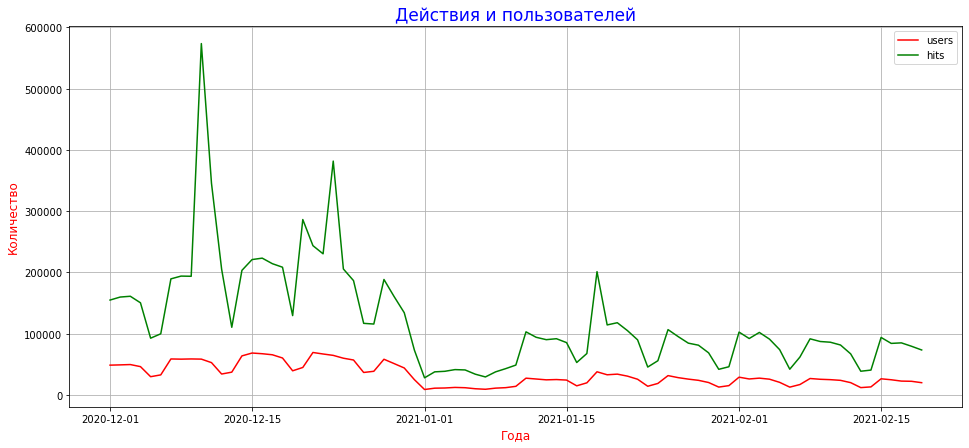

In [104]:
df_action_date_nan_out = df_out_nan.groupby('date').agg({'users':'sum', 'hits':'sum'}).reset_index()
plt.figure(figsize=(16, 7))
plt.plot(df_action_date_nan_out['date'], df_action_date_nan_out['users'], '-r', label='users')
plt.plot(df_action_date_nan_out['date'], df_action_date_nan_out['hits'], '-g', label='hits')

#plt.plot(df_date['year_of_release'], df_date['total_sales'], '-r');
plt.title('Действия и пользователей', fontsize=17, color='blue')
plt.xlabel('Года',fontsize=12, color='red')
plt.ylabel('Количество',fontsize=12, color='red')
plt.legend()
plt.grid(True)
plt.show()

In [105]:
df_action_date_nan_out['hits'].max()

573558.0

#### Также видим какой то всплеск действий посмотрим на него подробнее

In [106]:
df_action_date['hits'].max()

2808960.0

In [107]:
df_action_date[df_action_date['hits']==2808960]

,date,users,hits
9,2020-12-10,219659.0,2808960.0


In [108]:
df_action_date_nan_out[df_action_date_nan_out['hits']==573558]

,date,users,hits
9,2020-12-10,58356.0,573558.0


In [109]:
df[df['date'] == '2020-12-10'].sort_values(by='users', ascending=False)

,Unnamed: 0,date,hit_category,details,users,hits
6880,6880,2020-12-10,Просмотр блоков,NaN,161298.0,2235387.0
47844,47844,2020-12-10,Просмотр блоков,"блок 1: государственная регистрация самоходных машин, блок 2: выдача удостоверения тракториста-машиниста (тракториста), блок 3: заявление на выпуск карты москвича для учащегося, блок 4: заявление на выпуск карты москвича для студента/ординатора/аспиранта/ассистента-стажёра, блок 5: оформление решения о согласовании переустройства и (или) перепланировки помещения в многоквартирном доме и жилом доме",5382.0,27585.0
38883,38883,2020-12-10,Просмотр блоков,блок 1: доступ к электронному дневнику,4097.0,33251.0
99864,99864,2020-12-10,Просмотр блоков,блок 1: прием заявлений на запись (перевод) в образовательную организацию (дошкольные группы),2864.0,36434.0
36451,36451,2020-12-10,Клик в разделе,блок 1: доступ к электронному дневнику,2594.0,16222.0
...,...,...,...,...,...,...
48454,48454,2020-12-10,Просмотр блоков,"блок 1: заявление на выпуск карты москвича для учащегося, блок 2: запись в кружки, спортивные секции, дома творчества, блок 3: посещение и питание, блок 4: пополнение счёта карты ребёнка, блок 5: путёвки на отдых и оздоровление детей",5.0,289.0
48281,48281,2020-12-10,Просмотр блоков,"блок 1: заявление на выпуск карты москвича для учащегося, блок 2: пополнение счёта карты ребёнка, блок 3: доступ к электронному дневнику",5.0,30.0
48279,48279,2020-12-10,Просмотр блоков,"блок 1: запись в кружки, спортивные секции, дома творчества, блок 2: запись на приём, блок 3: запись на приём к врачу, отмена и перенос записи, блок 4: пополнение карты «тройка», блок 5: прием заявлений на запись (перевод) в образовательную организацию (дошкольные группы)",5.0,15.0
48257,48257,2020-12-10,Просмотр блоков,"блок 1: путёвки на отдых и оздоровление детей, блок 2: доступ к электронному дневнику, блок 3: запись на приём к врачу, отмена и перенос записи, блок 4: предоставление информации о результатах государственной итоговой аттестации (егэ, огэ, гвэ), итогового сочинения (изложения), итогового собеседования по русскому языку, блок 5: прием заявлений на запись (перевод) в образовательную организацию (дошкольные группы)",5.0,30.0


<div style="border:solid red 2px; padding: 20px">
<div class="alert alert-danger">
<b>Внимание</b></div>
Не очень понятно , видим всплеск 2020-12-10. Может быть акция была какаято?

### Попробуем выяснить какой состав "Избранного" наиболее популярен у пользователей, соответственно в этом порядке логично расположить вкладки чтобы клиентам было удобнее 

In [110]:
display(df['details'].value_counts().head(40))

блок 1: доступ к электронному дневнику                                                                                                                                             162
блок 1: запись на приём к врачу, отмена и перенос записи                                                                                                                           162
блок 1: прием заявлений на запись (перевод) в образовательную организацию (дошкольные группы)                                                                                      162
блок 1: приём показаний приборов учёта воды                                                                                                                                        162
блок 1: получение и оплата епд                                                                                                                                                     160
блок 1: запись на приём                                                              

## Выявим наиболее популярные у пользователей наборы пунктов избранного

####  Сгруппируем таблицу по деталям и количеству пользователей

In [111]:
df_favor = df.groupby('details').agg({'users':'sum','hits':'sum'}).sort_values(by='users', ascending=False)

In [112]:
display(df_favor.head(15))

,users,hits
details,,
блок 1: доступ к электронному дневнику,275049.0,765338.0
"блок 1: государственная регистрация самоходных машин, блок 2: выдача удостоверения тракториста-машиниста (тракториста), блок 3: заявление на выпуск карты москвича для учащегося, блок 4: заявление на выпуск карты москвича для студента/ординатора/аспиранта/ассистента-стажёра, блок 5: оформление решения о согласовании переустройства и (или) перепланировки помещения в многоквартирном доме и жилом доме",163623.0,333277.0
блок 1: прием заявлений на запись (перевод) в образовательную организацию (дошкольные группы),143530.0,669601.0
"блок 1: запись на приём к врачу, отмена и перенос записи",143431.0,494655.0
блок 1: заявление на выпуск карты москвича для учащегося,91375.0,377561.0
"блок 1: запись в кружки, спортивные секции, дома творчества",80680.0,340297.0
блок 1: приём показаний приборов учёта воды,72576.0,279685.0
блок 1: посещение и питание,57906.0,234313.0
блок 1: запись на приём,41145.0,126480.0


<div style="border:solid red 2px; padding: 20px">
<div class="alert alert-danger">
<b>Внимание</b></div>

 <b>   Видим наиболее популярные у пользователей наборы  пунктов избранного<b>

<div style="border:solid red 2px; padding: 20px">
<div class="alert alert-danger">
<b>Внимание</b></div>

Хорошо бы конечно чтобы пользователи были разбиты на категории и персонализированы мы могли бы посмотреть какой состав избранного у какой категории наиболее популярен

In [113]:
df_favor.reset_index().head(20)

,details,users,hits
0,блок 1: доступ к электронному дневнику,275049.0,765338.0
1,"блок 1: государственная регистрация самоходных машин, блок 2: выдача удостоверения тракториста-машиниста (тракториста), блок 3: заявление на выпуск карты москвича для учащегося, блок 4: заявление на выпуск карты москвича для студента/ординатора/аспиранта/ассистента-стажёра, блок 5: оформление решения о согласовании переустройства и (или) перепланировки помещения в многоквартирном доме и жилом доме",163623.0,333277.0
2,блок 1: прием заявлений на запись (перевод) в образовательную организацию (дошкольные группы),143530.0,669601.0
3,"блок 1: запись на приём к врачу, отмена и перенос записи",143431.0,494655.0
4,блок 1: заявление на выпуск карты москвича для учащегося,91375.0,377561.0
5,"блок 1: запись в кружки, спортивные секции, дома творчества",80680.0,340297.0
6,блок 1: приём показаний приборов учёта воды,72576.0,279685.0
7,блок 1: посещение и питание,57906.0,234313.0
8,блок 1: запись на приём,41145.0,126480.0
9,блок 1: пополнение счёта карты ребёнка,37757.0,101212.0


In [114]:
df[df['details'] == 'блок 1: null'].count()

Unnamed: 0      93
date            93
hit_category    93
details         93
users           93
hits            93
dtype: int64

In [115]:
df[df['details'] == 'блок 1: null']

,Unnamed: 0,date,hit_category,details,users,hits
76,76,2021-02-01,Просмотр блоков,блок 1: null,259.0,1015.0
146,146,2020-12-26,Просмотр блоков,блок 1: null,228.0,828.0
2847,2847,2021-01-01,Просмотр блоков,блок 1: null,76.0,330.0
5515,5515,2020-12-09,Просмотр блоков,блок 1: null,345.0,1107.0
5707,5707,2021-02-14,Просмотр блоков,блок 1: null,91.0,487.0
7551,7551,2021-01-20,Просмотр блоков,блок 1: null,218.0,650.0
9652,9652,2021-01-31,Просмотр блоков,блок 1: null,117.0,609.0
10079,10079,2020-12-27,Просмотр блоков,блок 1: null,147.0,635.0
11483,11483,2021-01-02,Просмотр блоков,блок 1: null,102.0,376.0
12186,12186,2020-12-08,Просмотр блоков,блок 1: null,325.0,1244.0


<div style="border:solid red 2px; padding: 20px">
<div class="alert alert-danger">
<b>Внимание</b></div>
Выявлен артефакт видимо проблема в заполнении дата фрейма, заносится и `Блок 1: null` и NaN

## Выявим популярность пунктов Избранного, по частоте использования каждого

In [116]:
df.head()

,Unnamed: 0,date,hit_category,details,users,hits
0,0,2020-12-23,Просмотр блоков,"блок 1: проверка и пополнение баланса домашнего телефона мгтс, блок 2: запрос, изменение и отмена доступа к электронной медицинской карте",5.0,10.0
1,1,2020-12-13,Просмотр блоков,"блок 1: пополнение счёта карты ребёнка, блок 2: доступ к электронному дневнику, блок 3: запись в кружки, спортивные секции, дома творчества, блок 4: запись на приём к врачу, отмена и перенос записи",25.0,91.0
2,2,2020-12-29,Просмотр блоков,"блок 1: подача заявления и документов для назначения и предоставления единовременной компенсационной выплаты на возмещение расходов в связи с рождением (усыновлением) ребенка, блок 2: прием заявлений на запись (перевод) в образовательную организацию (дошкольные группы)",122.0,482.0
3,3,2021-01-11,Просмотр блоков,"блок 1: запись на приём к врачу, отмена и перенос записи, блок 2: предоставление сведений фондом капитального ремонта многоквартирных домов города москвы, блок 3: предоставление информации технического учета в городе москве, блок 4: предоставление информации жилищного учёта, блок 5: подписка на информирование о результатах лабораторных, инструментальных и иных видов диагностических исследований",5.0,10.0
4,4,2020-12-05,Просмотр блоков,"блок 1: поиск медучреждений, блок 2: путёвки на отдых и оздоровление детей, блок 3: запись в кружки, спортивные секции, дома творчества, блок 4: запись на приём, блок 5: запись на приём к врачу, отмена и перенос записи",5.0,56.0


In [117]:
df['details_to_list'] = df['details'].str.split(', блок')

In [118]:
df.head()

,Unnamed: 0,date,hit_category,details,users,hits,details_to_list
0,0,2020-12-23,Просмотр блоков,"блок 1: проверка и пополнение баланса домашнего телефона мгтс, блок 2: запрос, изменение и отмена доступа к электронной медицинской карте",5.0,10.0,"[блок 1: проверка и пополнение баланса домашнего телефона мгтс, 2: запрос, изменение и отмена доступа к электронной медицинской карте]"
1,1,2020-12-13,Просмотр блоков,"блок 1: пополнение счёта карты ребёнка, блок 2: доступ к электронному дневнику, блок 3: запись в кружки, спортивные секции, дома творчества, блок 4: запись на приём к врачу, отмена и перенос записи",25.0,91.0,"[блок 1: пополнение счёта карты ребёнка, 2: доступ к электронному дневнику, 3: запись в кружки, спортивные секции, дома творчества, 4: запись на приём к врачу, отмена и перенос записи]"
2,2,2020-12-29,Просмотр блоков,"блок 1: подача заявления и документов для назначения и предоставления единовременной компенсационной выплаты на возмещение расходов в связи с рождением (усыновлением) ребенка, блок 2: прием заявлений на запись (перевод) в образовательную организацию (дошкольные группы)",122.0,482.0,"[блок 1: подача заявления и документов для назначения и предоставления единовременной компенсационной выплаты на возмещение расходов в связи с рождением (усыновлением) ребенка, 2: прием заявлений на запись (перевод) в образовательную организацию (дошкольные группы)]"
3,3,2021-01-11,Просмотр блоков,"блок 1: запись на приём к врачу, отмена и перенос записи, блок 2: предоставление сведений фондом капитального ремонта многоквартирных домов города москвы, блок 3: предоставление информации технического учета в городе москве, блок 4: предоставление информации жилищного учёта, блок 5: подписка на информирование о результатах лабораторных, инструментальных и иных видов диагностических исследований",5.0,10.0,"[блок 1: запись на приём к врачу, отмена и перенос записи, 2: предоставление сведений фондом капитального ремонта многоквартирных домов города москвы, 3: предоставление информации технического учета в городе москве, 4: предоставление информации жилищного учёта, 5: подписка на информирование о результатах лабораторных, инструментальных и иных видов диагностических исследований]"
4,4,2020-12-05,Просмотр блоков,"блок 1: поиск медучреждений, блок 2: путёвки на отдых и оздоровление детей, блок 3: запись в кружки, спортивные секции, дома творчества, блок 4: запись на приём, блок 5: запись на приём к врачу, отмена и перенос записи",5.0,56.0,"[блок 1: поиск медучреждений, 2: путёвки на отдых и оздоровление детей, 3: запись в кружки, спортивные секции, дома творчества, 4: запись на приём, 5: запись на приём к врачу, отмена и перенос записи]"


In [119]:
data = df.explode('details_to_list')

In [120]:
pd.set_option('max_colwidth', 2000)
data[['details', 'details_to_list']]

,details,details_to_list
0,"блок 1: проверка и пополнение баланса домашнего телефона мгтс, блок 2: запрос, изменение и отмена доступа к электронной медицинской карте",блок 1: проверка и пополнение баланса домашнего телефона мгтс
0,"блок 1: проверка и пополнение баланса домашнего телефона мгтс, блок 2: запрос, изменение и отмена доступа к электронной медицинской карте","2: запрос, изменение и отмена доступа к электронной медицинской карте"
1,"блок 1: пополнение счёта карты ребёнка, блок 2: доступ к электронному дневнику, блок 3: запись в кружки, спортивные секции, дома творчества, блок 4: запись на приём к врачу, отмена и перенос записи",блок 1: пополнение счёта карты ребёнка
1,"блок 1: пополнение счёта карты ребёнка, блок 2: доступ к электронному дневнику, блок 3: запись в кружки, спортивные секции, дома творчества, блок 4: запись на приём к врачу, отмена и перенос записи",2: доступ к электронному дневнику
1,"блок 1: пополнение счёта карты ребёнка, блок 2: доступ к электронному дневнику, блок 3: запись в кружки, спортивные секции, дома творчества, блок 4: запись на приём к врачу, отмена и перенос записи","3: запись в кружки, спортивные секции, дома творчества"
...,...,...
129131,"блок 1: путёвки для отдыха и оздоровления детей, блок 2: подача заявления и документов для назначения и предоставления ежемесячного пособия на ребенка, блок 3: запись на приём к врачу, отмена и перенос записи, блок 4: подписка на информирование о результатах лабораторных, инструментальных и иных видов диагностических исследований","3: запись на приём к врачу, отмена и перенос записи"
129131,"блок 1: путёвки для отдыха и оздоровления детей, блок 2: подача заявления и документов для назначения и предоставления ежемесячного пособия на ребенка, блок 3: запись на приём к врачу, отмена и перенос записи, блок 4: подписка на информирование о результатах лабораторных, инструментальных и иных видов диагностических исследований","4: подписка на информирование о результатах лабораторных, инструментальных и иных видов диагностических исследований"
129132,"блок 1: прием показаний электросчетчиков и оплата электроэнергии, блок 2: предоставление сведений фондом капитального ремонта многоквартирных домов города москвы",блок 1: прием показаний электросчетчиков и оплата электроэнергии
129132,"блок 1: прием показаний электросчетчиков и оплата электроэнергии, блок 2: предоставление сведений фондом капитального ремонта многоквартирных домов города москвы",2: предоставление сведений фондом капитального ремонта многоквартирных домов города москвы


In [121]:
df_details_to_list = data.groupby('details_to_list').agg({'users':'sum','hits':'sum'}).sort_values(by='users', ascending=False)

In [122]:
display(df_details_to_list.head(40))

,users,hits
details_to_list,,
блок 1: доступ к электронному дневнику,384324.0,1184480.0
"блок 1: запись на приём к врачу, отмена и перенос записи",237278.0,870846.0
блок 1: прием заявлений на запись (перевод) в образовательную организацию (дошкольные группы),199555.0,923278.0
3: заявление на выпуск карты москвича для учащегося,189530.0,414598.0
4: заявление на выпуск карты москвича для студента/ординатора/аспиранта/ассистента-стажёра,175124.0,353933.0
2: выдача удостоверения тракториста-машиниста (тракториста),174794.0,353404.0
5: оформление решения о согласовании переустройства и (или) перепланировки помещения в многоквартирном доме и жилом доме,174494.0,352337.0
блок 1: государственная регистрация самоходных машин,169302.0,362775.0
"блок 1: запись в кружки, спортивные секции, дома творчества",143374.0,606658.0


<div style="border:solid red 2px; padding: 20px">
<div class="alert alert-danger">
<b>Внимание</b></div>

<b>Мы получили рейтинг частоты использования пунктов избранного для удобства пользователей стоит расположить их по мере убывания популярности использования<b>

# Выводы после работы с выборкой<a id="cell1"></a>

## Идея по улучшению удобства пользователей 
В меню **`Добавить услугу в Избранное`** расположить услуги по популярности использования.
примем за гипотезу что если мы расположим услуги по популярности людям будет более удобно пользоваться сайтом и посещаемось сайта возрастет
также если мы расположим услуги по популярности людям будет более удобно пользоваться сайтом и действия людей на сайте возрастут (они чаще его будут применять для решения своих проблем)

## Особенности предоставленной выборки:
- В колонке `users`  аномально большое  количество значений пять,   76,3% Неплохо бы выяснить почему так произошло, без дополнительной информации непонятно почему так и на что это влияет
- Большинство пользователей 74% не использует Избранное, как видно из выводов ниже пользоваться им не очень удобно (отчасти и сайтом тоже), есть куда исправлять ситуацию
- Перед новым годом возрастает активность пользователей. Не очень понятный момент, видим всплеск 2020-12-10 Не очень понятно , видим всплеск 2020-12-10. Может быть акция была какаято?
- Выявлен артефакт, видимо проблема в заполнении дата фрейма, заносится и `Блок 1: null` и NaN

#### Составлены два рейтинга популярности выборок Избранного, групповои и одиночный. 
- Хорошо бы конечно чтобы пользователи были разбиты на категории и персонализированы мы могли бы посмотреть какой состав избранного у какой категории наиболее популярен
- Мы получили рейтинг частоты использования пунктов избранного для удобства пользователей стоит расположить их по мере убывания популярности использования и посмотреть как это повлияет на поведение пользователей увеличится ли использование Избранного

**Рекомендую использовать одиночный рейтинг популярности как более ролевантный**

## Что можно добавить в выборку:
- Песонализировать пользователей по отдельному id и добавить категории: семейное положение, возраст, наличие детей.
- мы могли бы проанализировать предпочтения клиентов о составе “Избранного” в зависимости от конкретной категории.


# Замечания после обзора сайта:
**Tестовое задание в mos.ru 22.03.2021  
браузер Google Chrome  
Версия 87.0.4280.141 (Официальная сборка), (64 бит)**

- При раскрытии списка добавления услуг кнопка добавить находится справа
![](https://raw.githubusercontent.com/konicaRu/pictures_blog/master/mos_ru_1.jpg)

а инстинктивно кликаешь на саму надпись мышь попадает туда, в этом случае услуга не добавляется а открывается в отдельном окне информация о ней, это неукдобно.
варианты решения: 
по клику на текст добавлять услугу а справа сделать кнопку открыть
в случае клика по тексту добавлять услугу в избранное автоматически
Стоит проверить понравится ли это пользователям при введении новшества провести АВ тест. Части пользователям показывать новые версии части старые версии. 

- Попробовать для удобства доступа добавить Избранное в выпадающее меню и меню быстрого доступа
![](https://raw.githubusercontent.com/konicaRu/pictures_blog/master/mos_ru_2.jpg)
- не знаю это баг или фича, но невозможно продолжить работу не введя снилс, ни отмена, ни закрытие окна, ни щелканье на свободном поле  не работает , окно исчезает и появляется снова.
Когда ввел СНИЛС окно исчезает , но при следующей загрузке сайта появляется снова и требует его ввести.
![](https://raw.githubusercontent.com/konicaRu/pictures_blog/master/mos_ru_3.jpg)

- Не обнаружил функцию удалить аккаунт.  
На мой взгляд эта возможность должна быть ее отсутствие некорректное отношение в пользователям, формирующие негативное отношение к сайту.